# Velocity Optimization

GraphVelo is a graph-based machine learning procedure that uses RNA velocities inferred from existing methods as input and infers velocity vectors that lie in the tangent space of the low-dimensional manifold formed by the single-cell data.

- Refine the velocity vectors estimated by any methods (e.g., splicing-based, metabolic labeling-based, pseudotime-based, lineage tracing-based, etc.) to the data manifold
- Infer modality dynamics that go beyond splicing events
    - Transcription rate of genes without introns or undergoing alternative splicing
    - Change rate of chromatin openness
    - More to be explored
- Serve as a plugin that can be seamlessly integrated into existing RNA velocity analysis pipelines
- Analyze dynamical systems in the context of multi-modal single-cell data

Cite: Chen, Y., Zhang, Y., Gan, J. et al. GraphVelo allows for accurate inference of multimodal velocities and molecular mechanisms for single cells. Nat Commun 16, 7831 (2025). https://doi.org/10.1038/s41467-025-62784-w

In [1]:
import scanpy as sc
import scvelo as scv
import omicverse as ov
ov.plot_set(font_path='Arial')

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf


/home/groups/xiaojie/steorra/env/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Registered as: Arial
🧬 Detecting GPU devices…
✅ NVIDIA CUDA GPUs detected: 1
    • [CUDA 0] NVIDIA H100 80GB HBM3
      Memory: 79.1 GB | Compute: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.8rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



## GraphVelo [LatentVelo]

Here, we use the velocity calculated result from the previous tutorial.

In [55]:
adata = scv.datasets.dentategyrus()
velo_obj=ov.single.Velo(adata)

In Velo module, you should keep all genes' expression not normalized.


In [56]:
velo_obj.adata=ov.read('data/velo/den_latentvelo.h5ad')

Input genes `gene_subset` will significantly impact GraphVelo's performance. For simplicity in this demonstration, we have used only state transition genes as input to GraphVelo. For more specific input genes, please refer to the official GraphVelo tutorial.

- scvelo demo: https://graphvelo.readthedocs.io/en/latest/graphvelo_notebooks/tutorials/tutorial_for_scvelo.html
- dynamo demo: https://graphvelo.readthedocs.io/en/latest/graphvelo_notebooks/tutorials/tutorial_hcmv.html

In [58]:
velo_obj.graphvelo(
    xkey='Ms',
    vkey='velo_latentvelo',
    n_jobs=1,
    basis_keys=['X_umap', 'X_pca'],
    gene_subset=velo_obj.adata.var.loc[velo_obj.adata.var['velo_latentvelo_genes']].index.tolist()
)





rojecting velocity vector to low dimensional embedding: 100%|██████████| 2930/2930 [00:00<00:00, 11851.52it/s]

In [ ]:
velo_obj.velocity_graph(
    vkey='velocity_gv',
    xkey='Ms',
    n_jobs=14,
)

In [60]:
velo_obj.velocity_embedding(
    basis='umap',
    vkey='velocity_gv',
)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_gv_umap', embedded velocity vectors (adata.obsm)


Text(0.5, 1.0, 'Velocity: GraphVelo-LatentVelo')

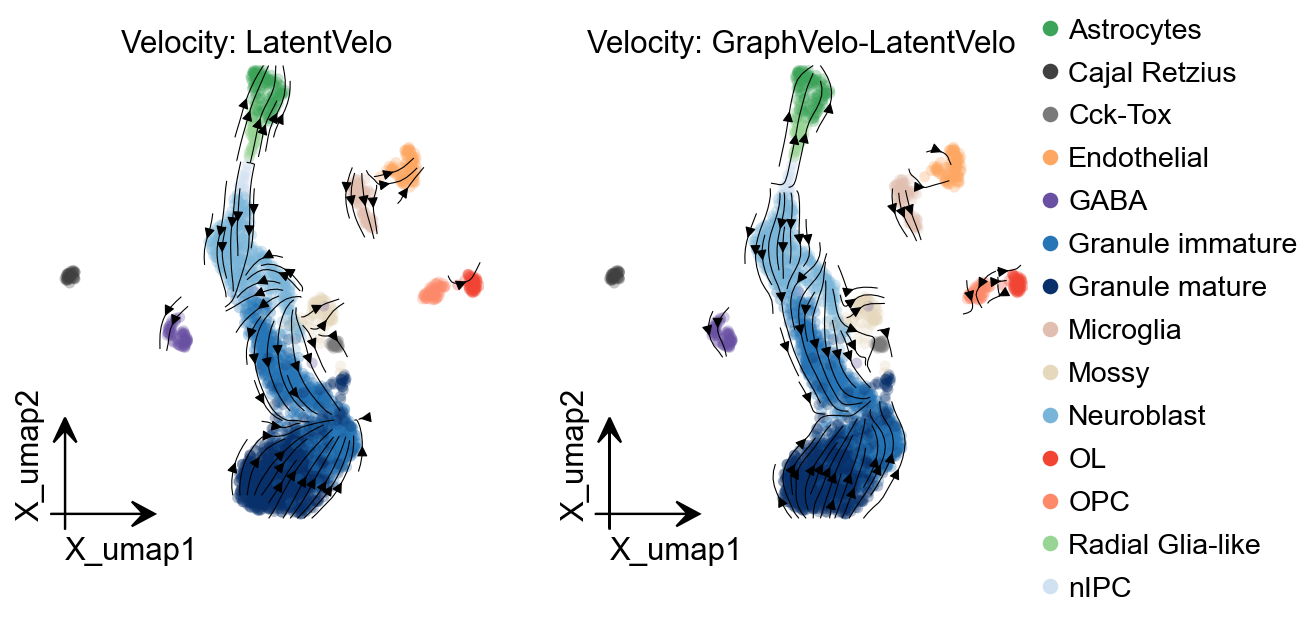

In [62]:
#fig = ov.plt.figure(figsize=(4, 4))
fig, axes = ov.plt.subplots(1,2,figsize=(8, 4))
ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=axes[0],
    show=False,
    legend_loc=None,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velo_latentvelo_umap',
    ax=axes[0],
)
axes[0].set_title('Velocity: LatentVelo')

ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=axes[1],
    show=False,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velocity_gv_umap',
    ax=axes[1],
)
axes[1].set_title('Velocity: GraphVelo-LatentVelo')

## GraphVelo [scVelo]

In [63]:
adata = scv.datasets.dentategyrus()
velo_obj=ov.single.Velo(adata)

In Velo module, you should keep all genes' expression not normalized.


In [64]:
velo_obj.adata=ov.read('data/velo/den_scvelo.h5ad')

In [65]:
velo_obj.graphvelo(
    xkey='Ms',
    vkey='velocity_S',
    n_jobs=1,
    basis_keys=['X_umap', 'X_pca'],
    gene_subset=velo_obj.adata.var.loc[velo_obj.adata.var['velocity_genes']].index.tolist()
)





rojecting velocity vector to low dimensional embedding: 100%|██████████| 2917/2917 [00:00<00:00, 11856.20it/s]

In [ ]:
velo_obj.velocity_graph(
    vkey='velocity_gv',
    xkey='Ms',
    n_jobs=8,
)

In [67]:
velo_obj.velocity_embedding(
    basis='umap',
    vkey='velocity_gv',
)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_gv_umap', embedded velocity vectors (adata.obsm)


Text(0.5, 1.0, 'Velocity: GraphVelo-scVelo')

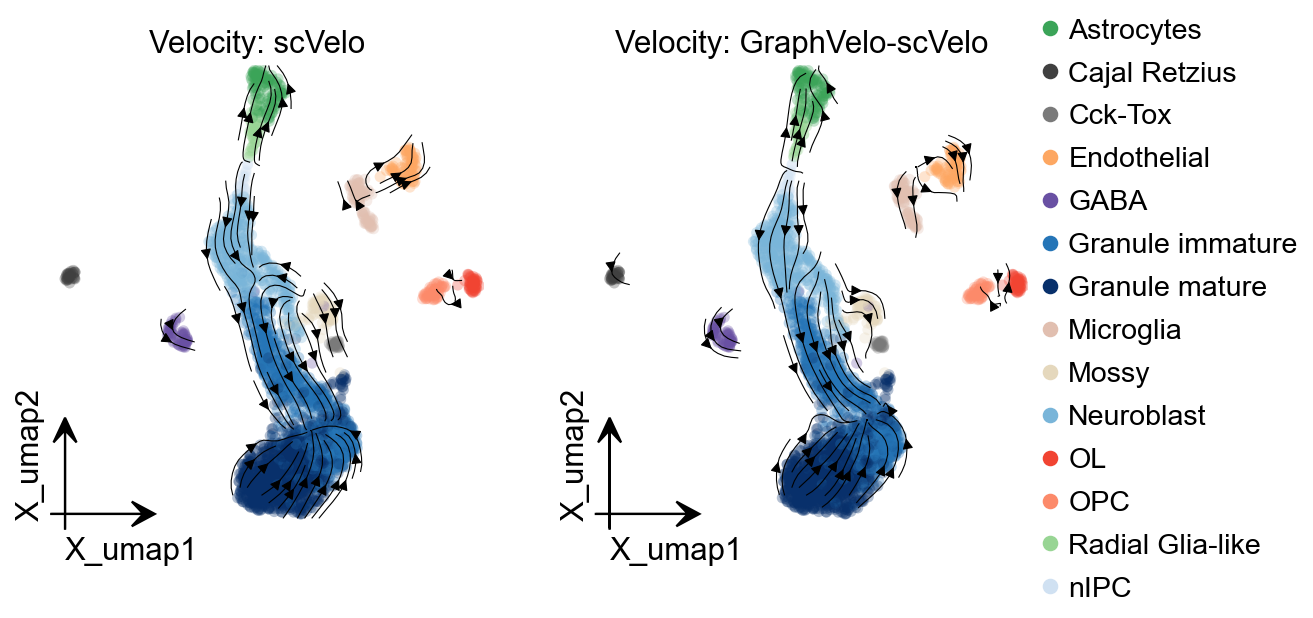

In [68]:
#fig = ov.plt.figure(figsize=(4, 4))
fig, axes = ov.plt.subplots(1,2,figsize=(8, 4))
ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=axes[0],
    show=False,
    legend_loc=None,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velocity_S_umap',
    ax=axes[0],
)
axes[0].set_title('Velocity: scVelo')

ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=axes[1],
    show=False,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velocity_gv_umap',
    ax=axes[1],
)
axes[1].set_title('Velocity: GraphVelo-scVelo')

## GraphVelo [Dynamo]

In [43]:
adata = scv.datasets.dentategyrus()
velo_obj=ov.single.Velo(adata)

In Velo module, you should keep all genes' expression not normalized.


In [44]:
velo_obj.adata=ov.read('data/velo/den_dynamo.h5ad')

Text(0.5, 1.0, 'Velocity: Dynamo')

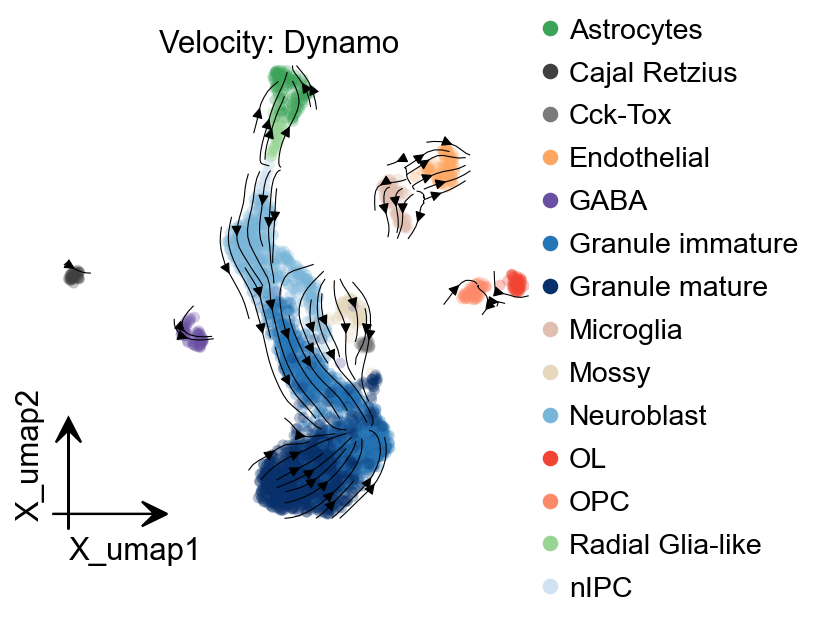

In [45]:
fig = ov.plt.figure(figsize=(4, 4))
ax = ov.plt.subplot(1, 1, 1)
ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=ax,
    show=False,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velocity_umap',
    ax=ax,
)
ov.plt.title('Velocity: Dynamo')

In [46]:
velo_obj.graphvelo(
    xkey='Ms',
    vkey='velocity_S',
    n_jobs=1,
    basis_keys=['X_umap', 'X_pca'],
    gene_subset=velo_obj.adata.var.loc[velo_obj.adata.var['velocity_S_genes']].index.tolist()
)





rojecting velocity vector to low dimensional embedding: 100%|██████████| 2917/2917 [00:00<00:00, 11579.69it/s]

In [ ]:
velo_obj.velocity_graph(
    vkey='velocity_gv',
    xkey='Ms',
    n_jobs=8,
)

In [48]:
velo_obj.velocity_embedding(
    basis='umap',
    vkey='velocity_gv',
)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_gv_umap', embedded velocity vectors (adata.obsm)


Text(0.5, 1.0, 'Velocity: GraphVelo-Dynamo')

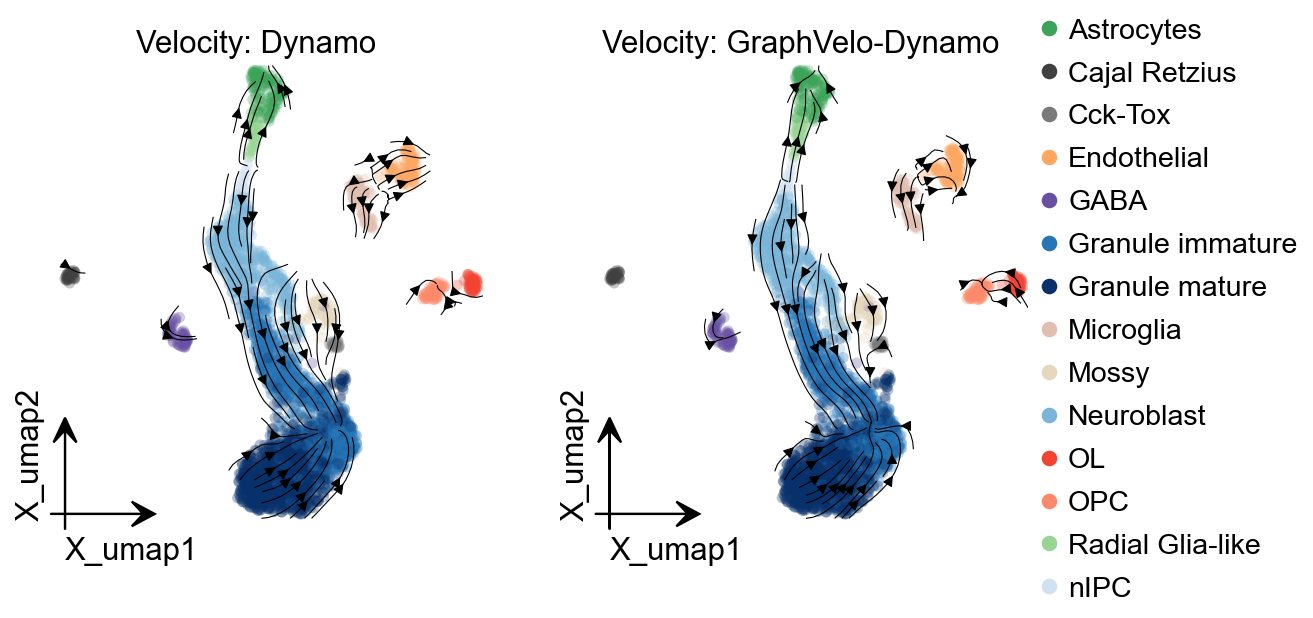

In [54]:
#fig = ov.plt.figure(figsize=(4, 4))
fig, axes = ov.plt.subplots(1,2,figsize=(8, 4))
ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=axes[0],
    show=False,
    legend_loc=None,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velocity_umap',
    ax=axes[0],
)
axes[0].set_title('Velocity: Dynamo')

ov.pl.embedding(
    velo_obj.adata,
    basis='X_umap',
    color='clusters',
    ax=axes[1],
    show=False,
    size=100,
    alpha=0.3
)
ov.pl.add_streamplot(
    velo_obj.adata,
    basis='X_umap',
    velocity_key='velocity_gv_umap',
    ax=axes[1],
)
axes[1].set_title('Velocity: GraphVelo-Dynamo')